In [1]:
!pip install lazyslide

INFO: pip is looking at multiple versions of ome-zarr to determine which version is compatible with other requirements. This could take a while.
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.8/87.8 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of s3fs to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.4/171.4 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 73.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.3/185.3 kB 14.7 MB/s eta 0:00:00
   ━━━━━

In [2]:
!pip install tiffslide

In [9]:
import lazyslide as zs

# Step 1: Opening a whole slide image

In [3]:
from huggingface_hub import hf_hub_download

slide = hf_hub_download(
    "rendeirolab/lazyslide-data",
    "GTEX-1117F-0526.svs",
    repo_type="dataset",
    cache_dir="."
)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


GTEX-1117F-0526.svs:   0%|          | 0.00/37.3M [00:00<?, ?B/s]

# Step 2: Understanding the WSIData object

In [4]:
from wsidata import open_wsi

wsi = open_wsi(slide)

/usr/lib/python3.12/importlib/__init__.py:90: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  return _bootstrap._gcd_import(name[level:], package, level)
/usr/local/lib/python3.12/dist-packages/cudf/utils/gpu_utils.py:75: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))


# Step 3: Exploring WSIData object

WSI: datasets--rendeirolab--lazyslide-data/snapshots/61b923cd2be1e50ed7116ecb93de47b8b4a5c947/GTEX-1117F-0526.svs
Reader: openslide
Dimensions: 19958×19919 (h×w), 3 Pyramids
Pixel physical size: 0.4942 MPP
SpatialData object
└── Images
      └── 'wsi_thumbnail': DataArray[cyx] (3, 1996, 1992)
with coordinate systems:
    ▸ 'global', with elements:
        wsi_thumbnail (Images)
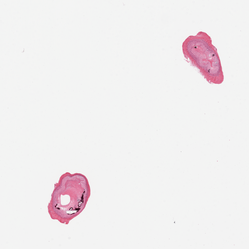

In [5]:
wsi

In [6]:
wsi.properties

Field,Value
shape,"[19958, 19919]"
n_level,3
level_shape,"[[19958, 19919], [4989, 4979], [2494, 2489]]"
level_downsample,"[1.0, 4.000501706284455, 8.002609074152414]"
mpp,0.4942
magnification,20.0
bounds,"[0, 0, 19919, 19958]"


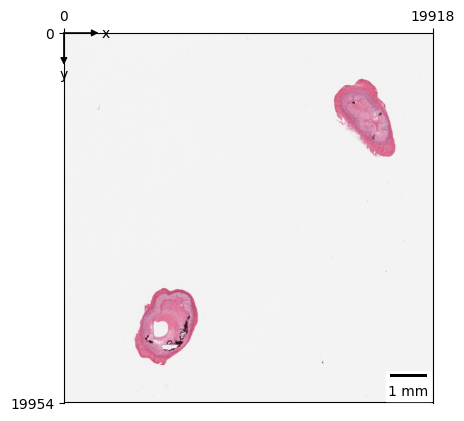

In [10]:
zs.pl.tissue(wsi)

In [11]:
wsi.write()

INFO     The Zarr backing store has been changed from None the new file path:                                      
         datasets--rendeirolab--lazyslide-data/snapshots/61b923cd2be1e50ed7116ecb93de47b8b4a5c947/GTEX-1117F-0526.z
         arr                                                                                                       


# Step 4: Tissue Segmentation

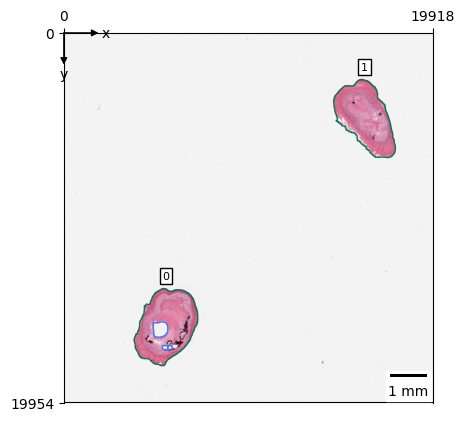

In [12]:
zs.pp.find_tissues(wsi)
zs.pl.tissue(wsi)

# Examining the segmentation results

WSI: datasets--rendeirolab--lazyslide-data/snapshots/61b923cd2be1e50ed7116ecb93de47b8b4a5c947/GTEX-1117F-0526.svs
Reader: openslide
Dimensions: 19958×19919 (h×w), 3 Pyramids
Pixel physical size: 0.4942 MPP
SpatialData object, with associated Zarr store: /content/datasets--rendeirolab--lazyslide-data/snapshots/61b923cd2be1e50ed7116ecb93de47b8b4a5c947/GTEX-1117F-0526.zarr
├── Images
│     └── 'wsi_thumbnail': DataArray[cyx] (3, 1996, 1992)
└── Shapes
      └── 'tissues': GeoDataFrame shape: (2, 2) (2D shapes)
with coordinate systems:
    ▸ 'global', with elements:
        wsi_thumbnail (Images), tissues (Shapes)
with the following elements not in the Zarr store:
    ▸ tissues (Shapes)
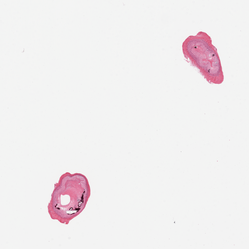

In [13]:
wsi

In [14]:
wsi["tissues"]

,tissue_id,geometry
0,0,"POLYGON ((5345.743 13804.501, 5337.74 13812.50..."
1,1,"POLYGON ((16029.226 2520.822, 16021.223 2528.8..."


# Focusing on individual tissue pieces

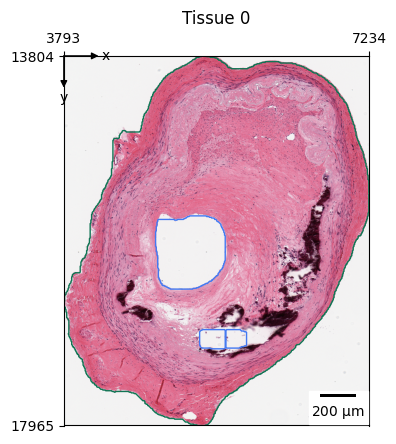

In [15]:
zs.pl.tissue(wsi, tissue_id=0)


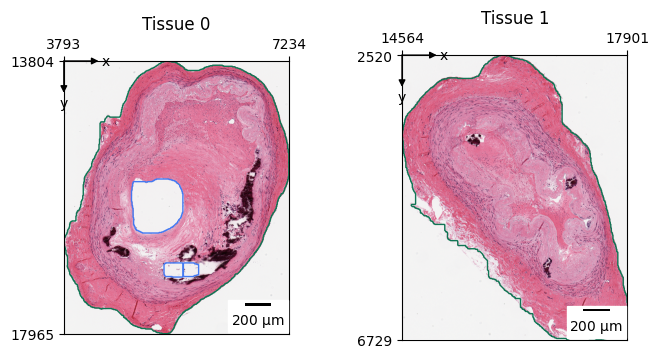

In [16]:
zs.pl.tissue(wsi, tissue_id="all")

In [17]:
wsi.write()

# Advanced topic: Deep learning-based tissue segmentation

In [18]:
zs.seg.tissue(wsi, key_added="dl-tissues")

PathProfiler/pathprofiler_tissue_seg_jit(…):   0%|          | 0.00/201M [00:00<?, ?B/s]

WSI: datasets--rendeirolab--lazyslide-data/snapshots/61b923cd2be1e50ed7116ecb93de47b8b4a5c947/GTEX-1117F-0526.svs
Reader: openslide
Dimensions: 19958×19919 (h×w), 3 Pyramids
Pixel physical size: 0.4942 MPP
SpatialData object, with associated Zarr store: /content/datasets--rendeirolab--lazyslide-data/snapshots/61b923cd2be1e50ed7116ecb93de47b8b4a5c947/GTEX-1117F-0526.zarr
├── Images
│     └── 'wsi_thumbnail': DataArray[cyx] (3, 1996, 1992)
└── Shapes
      ├── 'dl-tissues': GeoDataFrame shape: (2, 2) (2D shapes)
      └── 'tissues': GeoDataFrame shape: (2, 2) (2D shapes)
with coordinate systems:
    ▸ 'global', with elements:
        wsi_thumbnail (Images), dl-tissues (Shapes), tissues (Shapes)
with the following elements not in the Zarr store:
    ▸ dl-tissues (Shapes)
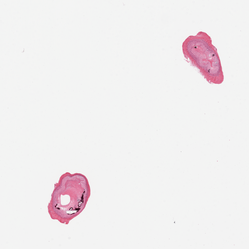

In [19]:
wsi

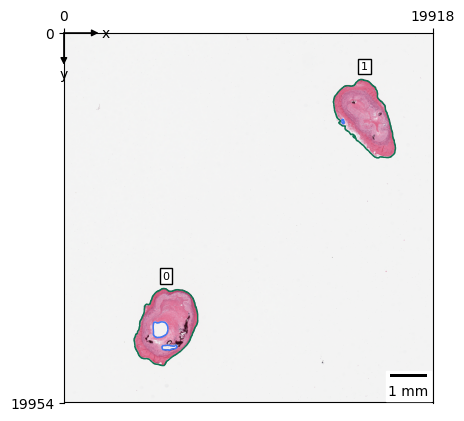

In [20]:
zs.pl.tissue(wsi, tissue_key="dl-tissues")

# Calculating tissue properties

In [21]:
zs.tl.tissue_props(wsi)

In [22]:
wsi["tissues"]

,tissue_id,geometry,area,area_filled,convex_area,solidity,convexity,axis_major_length,axis_minor_length,eccentricity,...,moment-mu21,moment-mu12,moment-mu03,moment-nu20,moment-nu11,moment-nu02,moment-nu30,moment-nu21,moment-nu12,moment-nu03
0,0,"POLYGON ((5345.743 13804.501, 5337.74 13812.50...",9295453.0,9962045.0,10318845.0,0.900823,1.110096,4348.672363,2953.654297,0.733946,...,1.881723e+14,-5.012970e+14,6.182167e+13,0.068301,-0.026006,0.104072,0.000592,0.000601,-0.001600,0.000197
1,1,"POLYGON ((16029.226 2520.822, 16021.223 2528.8...",8684173.0,8684173.0,9086193.5,0.955755,1.046293,4684.261719,2505.699219,0.844904,...,6.244954e+14,1.792367e+15,1.164329e+15,0.074724,0.048856,0.123623,-0.002956,0.002810,0.008065,0.005239


# Step 5: Tiling - Breaking down the WSI into manageable pieces

In [23]:
zs.pp.tile_tissues(wsi, 256, mpp=0.5)
wsi.tile_spec("tiles")

Tile at 0.5 mpp, 256×256 (h×w)
Stride: 256×256 (0×0 overlap)
Operation size: 259×259, level=0
Base size: 259×259, level=0
Target tissue: 'tissues'

In [24]:
# If use overlap
zs.pp.tile_tissues(wsi, 256, overlap=0.1, mpp=0.5, key_added="tile_overlap_0.1")
# If use stride_px
zs.pp.tile_tissues(wsi, 256, stride_px=200, mpp=0.5, key_added="tile_stride_200")
wsi.tile_spec("tile_stride_200")

Tile at 0.5 mpp, 256×256 (h×w)
Stride: 200×200 (56×56 overlap)
Operation size: 259×259, level=0
Base size: 259×259, level=0
Target tissue: 'tissues'

In [25]:
wsi["tiles"]

,tile_id,tissue_id,geometry
0,0,0,"POLYGON ((4052 16394, 4052 16653, 3793 16653, ..."
1,1,0,"POLYGON ((4052 16653, 4052 16912, 3793 16912, ..."
2,2,0,"POLYGON ((4311 15617, 4311 15876, 4052 15876, ..."
3,3,0,"POLYGON ((4311 15876, 4311 16135, 4052 16135, ..."
4,4,0,"POLYGON ((4311 16135, 4311 16394, 4052 16394, ..."
...,...,...,...
248,248,1,"POLYGON ((17672 5887, 17672 6146, 17413 6146, ..."
249,249,1,"POLYGON ((17672 6146, 17672 6405, 17413 6405, ..."
250,250,1,"POLYGON ((17672 6405, 17672 6664, 17413 6664, ..."
251,251,1,"POLYGON ((17931 5887, 17931 6146, 17672 6146, ..."


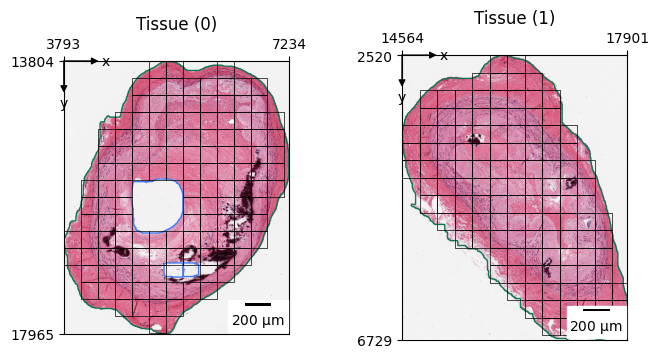

In [26]:
zs.pl.tiles(wsi, tissue_id="all", linewidth=0.5)

# Evaluating tile quality

In [27]:
zs.tl.tile_prediction(wsi, 'pathprofilerqc')

PathProfiler/pathprofiler_patch_quality_(…):   0%|          | 0.00/44.9M [00:00<?, ?B/s]

Output()

In [28]:
wsi["tiles"]

,tile_id,tissue_id,geometry,diagnostic_quality,visual_cleanliness,focus_issue,staining_issue,tissue_folding_present,misc_artifacts_present
0,0,0,"POLYGON ((4052 16394, 4052 16653, 3793 16653, ...",0.212358,-0.052757,0.318834,0.267328,0.003896,0.743416
1,1,0,"POLYGON ((4052 16653, 4052 16912, 3793 16912, ...",0.158073,-0.020617,0.272104,0.252748,-0.042276,0.838861
2,2,0,"POLYGON ((4311 15617, 4311 15876, 4052 15876, ...",0.036068,-0.043858,0.180339,0.249886,0.013996,0.907113
3,3,0,"POLYGON ((4311 15876, 4311 16135, 4052 16135, ...",0.087878,-0.023368,0.206672,0.204105,0.028838,0.832568
4,4,0,"POLYGON ((4311 16135, 4311 16394, 4052 16394, ...",0.043891,-0.016791,0.156625,0.159387,0.010374,0.867012
...,...,...,...,...,...,...,...,...,...
248,248,1,"POLYGON ((17672 5887, 17672 6146, 17413 6146, ...",0.246704,0.063703,0.077684,0.355271,0.022953,0.569547
249,249,1,"POLYGON ((17672 6146, 17672 6405, 17413 6405, ...",-0.034062,0.002440,0.051641,0.194340,0.007238,0.886124
250,250,1,"POLYGON ((17672 6405, 17672 6664, 17413 6664, ...",0.170865,0.018940,0.088636,0.259241,0.003885,0.737012
251,251,1,"POLYGON ((17931 5887, 17931 6146, 17672 6146, ...",0.072131,-0.048144,0.175295,0.202928,0.005964,0.975038


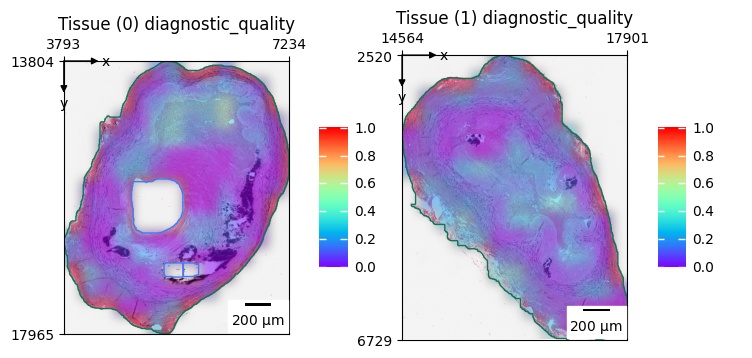

In [29]:
zs.pl.tiles(wsi, tissue_id="all", color="diagnostic_quality", cmap="rainbow",
            smooth=True, alpha=.5, vmin=0, vmax=1)

# Step 6: Feature extraction - transforming images into numerical representations

In [30]:
import timm
timm.list_models()
zs.tl.feature_extraction(wsi, "resnet50")

['aimv2_1b_patch14_224',
 'aimv2_1b_patch14_336',
 'aimv2_1b_patch14_448',
 'aimv2_3b_patch14_224',
 'aimv2_3b_patch14_336',
 'aimv2_3b_patch14_448',
 'aimv2_huge_patch14_224',
 'aimv2_huge_patch14_336',
 'aimv2_huge_patch14_448',
 'aimv2_large_patch14_224',
 'aimv2_large_patch14_336',
 'aimv2_large_patch14_448',
 'bat_resnext26ts',
 'beit3_base_patch16_224',
 'beit3_giant_patch14_224',
 'beit3_giant_patch14_336',
 'beit3_large_patch16_224',
 'beit_base_patch16_224',
 'beit_base_patch16_384',
 'beit_large_patch16_224',
 'beit_large_patch16_384',
 'beit_large_patch16_512',
 'beitv2_base_patch16_224',
 'beitv2_large_patch16_224',
 'botnet26t_256',
 'botnet50ts_256',
 'caformer_b36',
 'caformer_m36',
 'caformer_s18',
 'caformer_s36',
 'cait_m36_384',
 'cait_m48_448',
 'cait_s24_224',
 'cait_s24_384',
 'cait_s36_384',
 'cait_xs24_384',
 'cait_xxs24_224',
 'cait_xxs24_384',
 'cait_xxs36_224',
 'cait_xxs36_384',
 'coat_lite_medium',
 'coat_lite_medium_384',
 'coat_lite_mini',
 'coat_lite_sma

In [31]:
zs.models.list_models()[0:8]

['conch',
 'musk',
 'omiclip',
 'plip',
 'prism',
 'titan',
 'conch_v1.5',
 'cellpose']

WSI: datasets--rendeirolab--lazyslide-data/snapshots/61b923cd2be1e50ed7116ecb93de47b8b4a5c947/GTEX-1117F-0526.svs
Reader: openslide
Dimensions: 19958×19919 (h×w), 3 Pyramids
Pixel physical size: 0.4942 MPP
SpatialData object, with associated Zarr store: /content/datasets--rendeirolab--lazyslide-data/snapshots/61b923cd2be1e50ed7116ecb93de47b8b4a5c947/GTEX-1117F-0526.zarr
├── Images
│     └── 'wsi_thumbnail': DataArray[cyx] (3, 1996, 1992)
└── Shapes
      ├── 'dl-tissues': GeoDataFrame shape: (2, 2) (2D shapes)
      ├── 'tile_overlap_0.1': GeoDataFrame shape: (311, 3) (2D shapes)
      ├── 'tile_stride_200': GeoDataFrame shape: (415, 3) (2D shapes)
      ├── 'tiles': GeoDataFrame shape: (253, 9) (2D shapes)
      └── 'tissues': GeoDataFrame shape: (2, 51) (2D shapes)
with coordinate systems:
    ▸ 'global', with elements:
        wsi_thumbnail (Images), dl-tissues (Shapes), tile_overlap_0.1 (Shapes), tile_stride_200 (Shapes), tiles (Shapes), tissues (Shapes)
with the following elements not in the Zarr store:
    ▸ tiles (Shapes)
    ▸ tile_overlap_0.1 (Shapes)
    ▸ dl-tissues (Shapes)
    ▸ tile_stride_200 (Shapes)
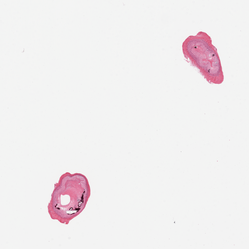

In [32]:
wsi

In [ ]:
zs.tl.feature_aggregation(wsi, "resnet50")
zs.tl.feature_aggregation(wsi, "resnet50", by="tissue_id")

In [ ]:
wsi["resnet50_tiles"]

# Save on the disk

In [39]:
wsi.write()

WSI: datasets--rendeirolab--lazyslide-data/snapshots/61b923cd2be1e50ed7116ecb93de47b8b4a5c947/GTEX-1117F-0526.svs
Reader: openslide
Dimensions: 19958×19919 (h×w), 3 Pyramids
Pixel physical size: 0.4942 MPP
SpatialData object, with associated Zarr store: /content/datasets--rendeirolab--lazyslide-data/snapshots/61b923cd2be1e50ed7116ecb93de47b8b4a5c947/GTEX-1117F-0526.zarr
├── Images
│     └── 'wsi_thumbnail': DataArray[cyx] (3, 1996, 1992)
└── Shapes
      ├── 'dl-tissues': GeoDataFrame shape: (2, 2) (2D shapes)
      ├── 'tile_overlap_0.1': GeoDataFrame shape: (311, 3) (2D shapes)
      ├── 'tile_stride_200': GeoDataFrame shape: (415, 3) (2D shapes)
      ├── 'tiles': GeoDataFrame shape: (253, 9) (2D shapes)
      └── 'tissues': GeoDataFrame shape: (2, 51) (2D shapes)
with coordinate systems:
    ▸ 'global', with elements:
        wsi_thumbnail (Images), dl-tissues (Shapes), tile_overlap_0.1 (Shapes), tile_stride_200 (Shapes), tiles (Shapes), tissues (Shapes)
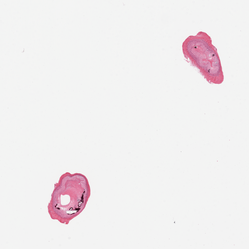

In [40]:
wsi